###### Consider a physician who's workload is 30 patients per day. Unfortunately, because of no-shows, about 25% of patients fail to show up to their appointments leading to loss revenue for the physician. In this activity we will walk through the process of finding the ideal amount of patient bookings per day. First, use python to intuitively calculate how many patients the physician should book to stay busy if only 75% of scheduled patients show up.

In [1]:
target_patients = 30  # Desired number of patients per day
show_rate = 0.75      # 75% show up rate
# Calculate ideal number of bookings
x = int(target_patients / show_rate)
print(x)

40


###### Because you are using historical data to assume 25% of patients no-show, this is a binomial distribution model. Similarly to how you calculate the normal distribution's Cumulative density function and Probability density function, do the same for this normal distribution. First fill in the x and probability values to display the normal distribution of the linearly calculated value you found in the previous step. 

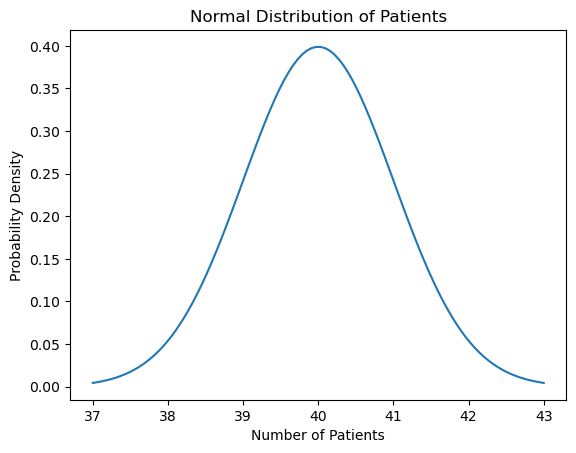

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
# Parameters for the normal distribution
mu = x  # Mean of the distribution
sigma = 1  # Standard deviation of the distribution
# Generate x values for the normal distribution
x_values = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# Calculate the probability density function (PDF) values
pdf_values = stats.norm.pdf(x_values, mu, sigma)
# Plot the normal distribution
plt.plot(x_values, pdf_values, label='Normal Distribution')
plt.xlabel('Number of Patients')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Patients') 
plt.show() 

###### Next, use Python's scipy.stats.binom package to get more insight of the situation. Find the cumulative density function to statistically calculate how much (in percent) will the physician be overbooked if we use the linear calculations from the first step to overbook patients. 

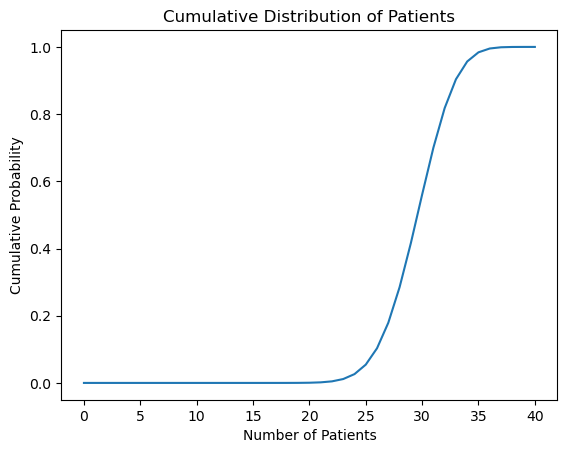

In [3]:
import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
# Parameters for the binomial distribution
n = x  # Number of trials (patients)
p = show_rate  # Probability of success (show up rate)
# Generate x values for the binomial distribution
x_values = np.arange(0, n+1)

# Calculate the cumulative distribution function (CDF) values
cdf_values = stats.binom.cdf(x_values, n, p)
# Plot the cumulative distribution
plt.plot(x_values, cdf_values, label='Cumulative Distribution')
plt.xlabel('Number of Patients')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Patients')
plt.show()

###### Finally, use the binomial ppf() function to what is the number of appointments the physician should book if she wants to limit the risk of having more than 30 appointments per day to 5%

In [4]:
from scipy.stats import binom
workload = 30
prob     = 0.75
# Target amount of overbooked patients
target   = 0.05
x = workload + binom.ppf(1-target, workload, 1-prob)    
print(x)

42.0
